In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
matplotlib.rcParams['figure.dpi'] = 2.5 * matplotlib.rcParams['figure.dpi']

import numpy as np
import sys, os, glob
import pandas as pd
import urllib
import PyPDF2 as pypdf

# Load Astro2020 data

In [5]:
data = pd.read_csv('./20190313154248-SurveyExport.csv')

In [7]:
data['Date Submitted'] = pd.to_datetime(data['Date Submitted'])

In [26]:
column = data['Date Submitted'][data['Date Submitted'] > '2019-03-11 00:00:00']

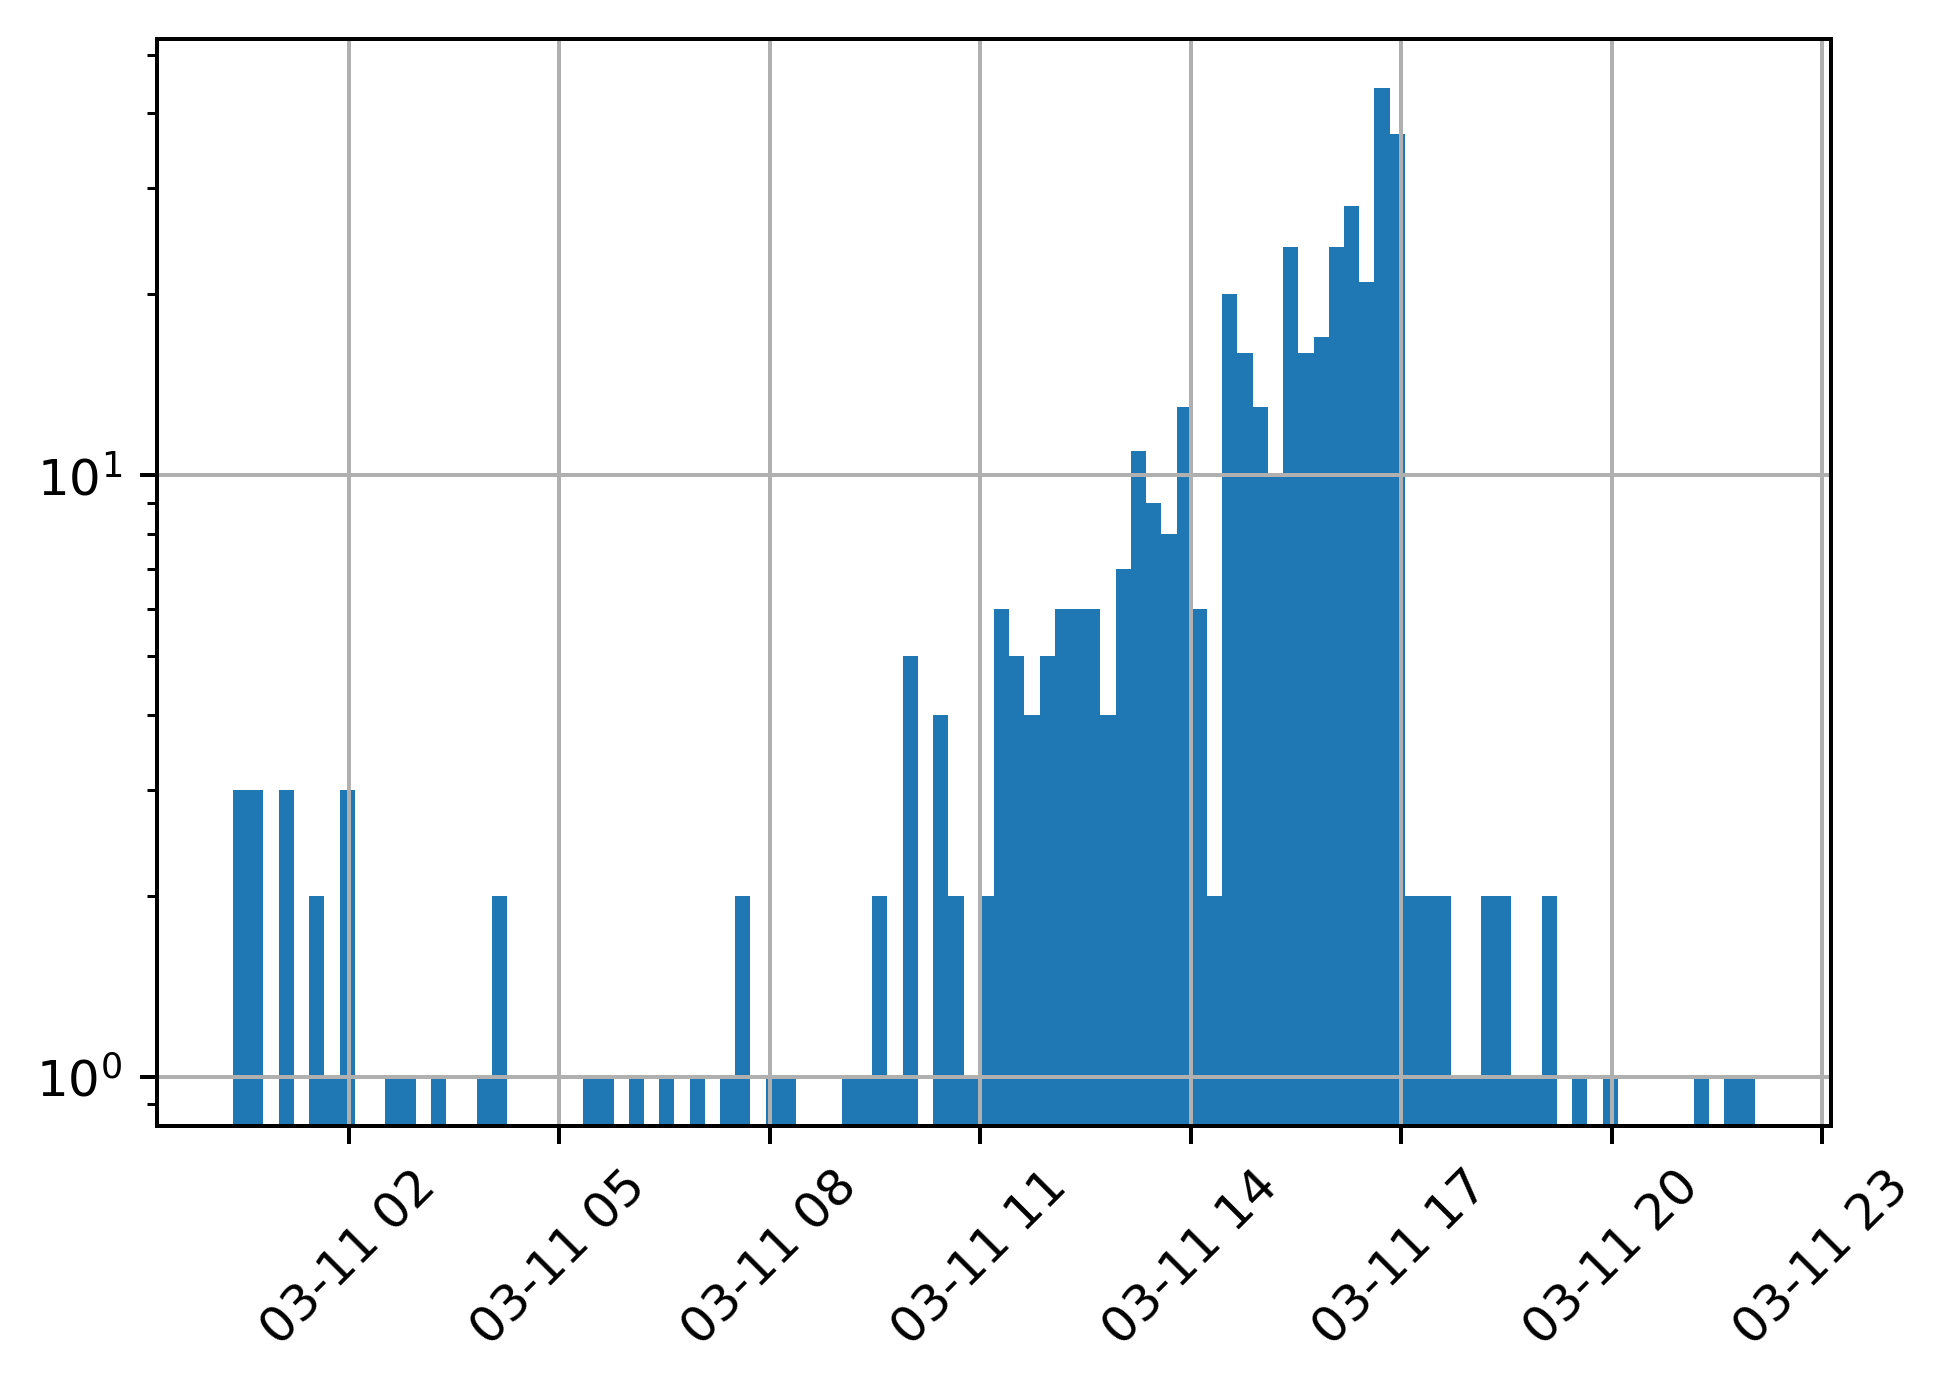

In [28]:
fig, ax = plt.subplots()

ax = column.hist(bins=100, xrot=45)
ax.set_yscale('log')

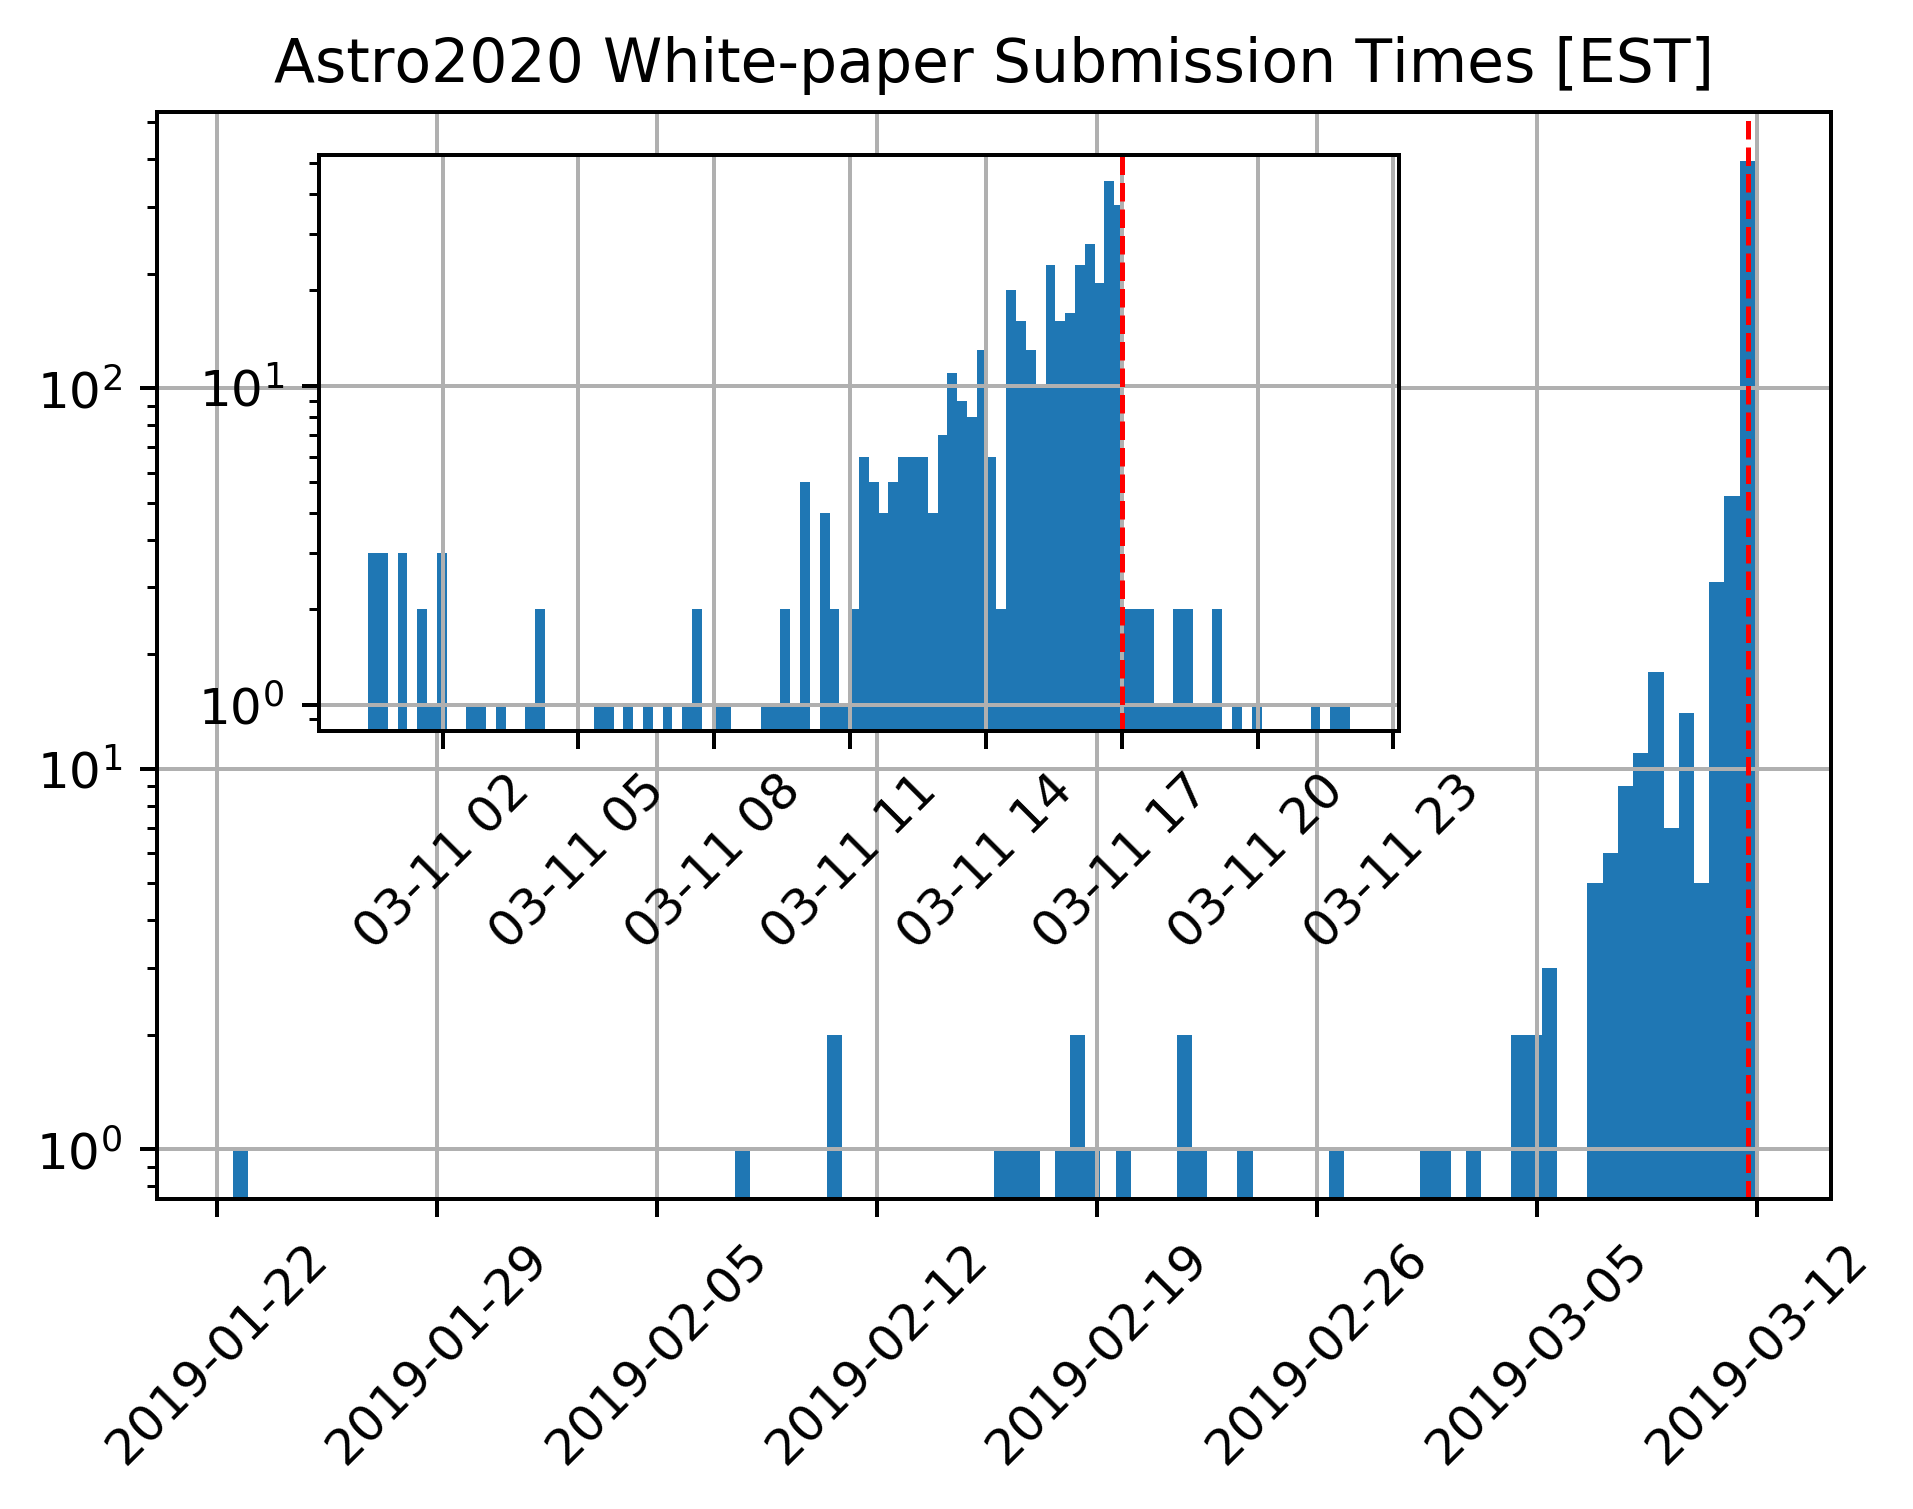

In [40]:
fig, ax = plt.subplots()

ax = data['Date Submitted'].hist(bins=100, xrot=45)
ax.set_yscale('log')
ax.axvline(pd.to_datetime('2019-03-11 17:00:00'), color='r', linestyle='--', lw=1)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.45, 0.5, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])
ax2 = column.hist(bins=100, xrot=45)
ax2.set_yscale('log')
ax2.axvline(pd.to_datetime('2019-03-11 17:00:00'), color='r', linestyle='--', lw=1)

ax.set_title('Astro2020 White-paper Submission Times [EST]')
plt.savefig('astro2020_submit_times.pdf',bbox_inches='tight',dpi=400)

# Define keyword

In [ ]:
keyword = 'gravitational wave'
#keyword = 'pulsar timing'
#keyword = 'black hole'

In [ ]:
ct = 0
for name in data['White Paper Title']:
    if keyword in name.strip('-').lower():
        print name
        ct += 1
print ct

# Make directory

In [ ]:
directory = './{}_papers'.format(keyword.replace(" ", ""))
if not os.path.exists(directory):
    os.makedirs(directory)

# Download all relevant whitepapers

In [ ]:
for ii,entry in data.iterrows():
    file_name = (entry['Last Name:Principal Author'] + 
                 entry['First Name:Principal Author'] + 
                 '.pdf')
    if keyword in entry['White Paper Title'].strip('-').lower():
        urllib.urlretrieve(entry['1:Upload File \xc2\xa0'], 
                           directory + '/' + file_name)
        print file_name  

# Concatenate pdf files

Creates table of contents based on the principal author's name.

In [ ]:
def PDFmerge(pdfs, output):
    # creating pdf file merger object
    pdfMerger = pypdf.PdfFileMerger()
 
    # appending pdfs one by one
    for pdf in pdfs:
        with open(pdf, 'rb') as f:
            pdfMerger.append(f, bookmark=pdf.split(directory + '/')[1], import_bookmarks=False)
 
    # writing combined pdf to output pdf file
    with open(output, 'wb') as f:
        pdfMerger.write(f)

In [ ]:
pdfs = sorted(glob.glob(directory + '/*.pdf'))

In [ ]:
PDFmerge(pdfs = pdfs, output = directory + '/' + keyword.replace(" ", "") + '.pdf')